In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install  seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [9]:
net = pd.read_csv("Internet-Demographic.csv")

In [10]:
net.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [11]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [12]:
net.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [13]:
net.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [14]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


<h1>Insight 1:  Distribution of Birth Rates</h1>

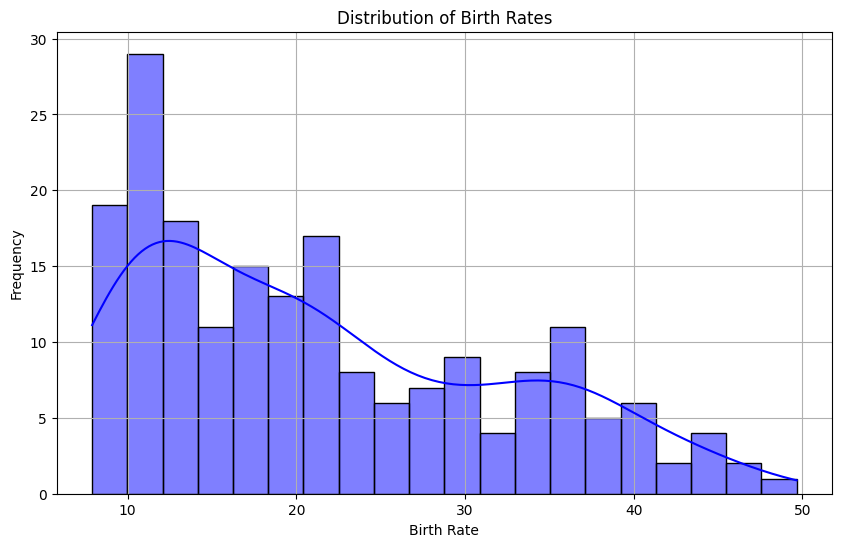

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(net["Birth rate"], bins=20, kde=True, color="blue")
plt.title("Distribution of Birth Rates")
plt.xlabel("Birth Rate")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

<h1>Insight 2: Top 5 Countries with the Highest Internet Usage</h1>

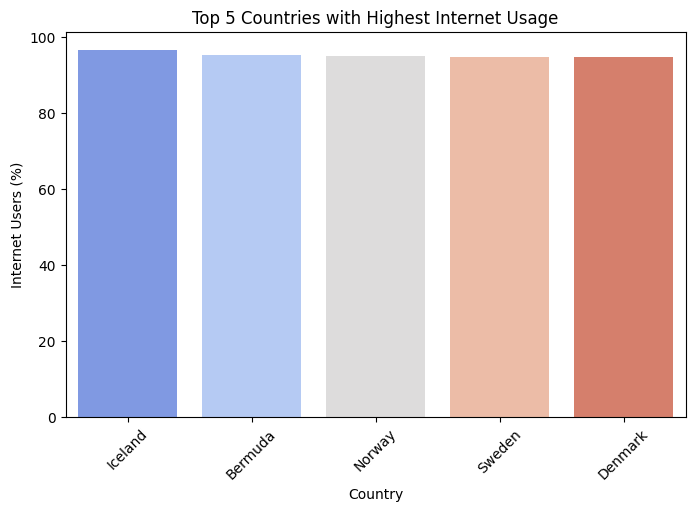

In [27]:
top5_internet = net.nlargest(5, "Internet users")
plt.figure(figsize=(8, 5))
sns.barplot(x=top5_internet["Country Name"], y=top5_internet["Internet users"], palette="coolwarm")
plt.title("Top 5 Countries with Highest Internet Usage")
plt.xlabel("Country")
plt.ylabel("Internet Users (%)")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 3: Count of Countries by Income Group</h1>

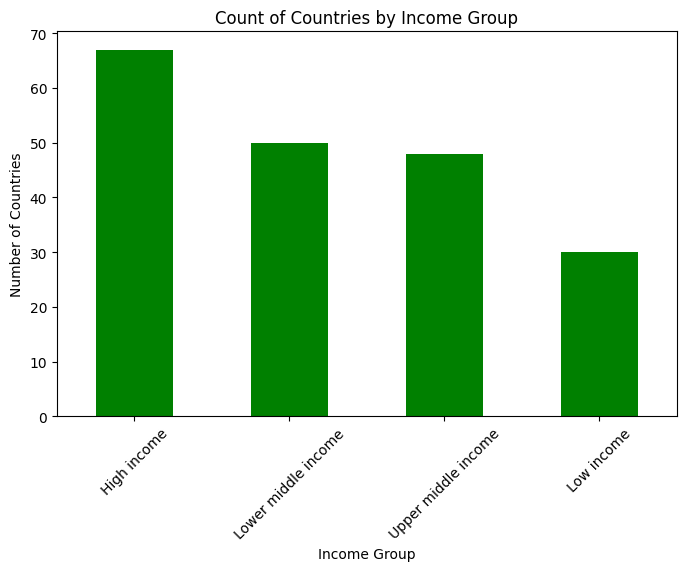

In [19]:
income_counts = net["Income Group"].value_counts()
plt.figure(figsize=(8, 5))
income_counts.plot(kind="bar", color="green")
plt.title("Count of Countries by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Countries")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 4: Box Plot of Internet Usage</h1>

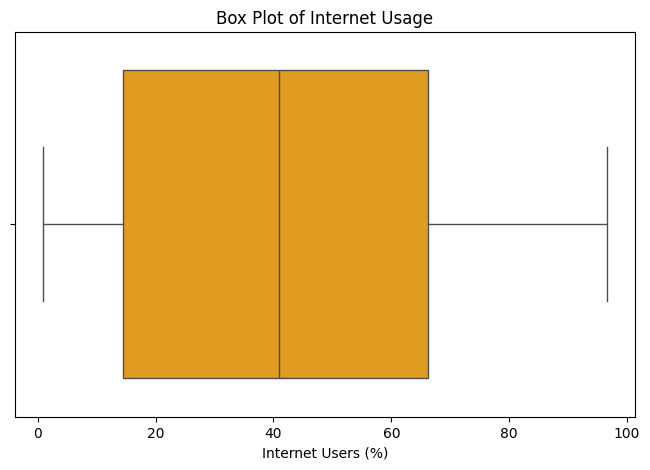

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=net["Internet users"], color="orange")
plt.title("Box Plot of Internet Usage")
plt.xlabel("Internet Users (%)")
plt.show()

<h1>Insight 5: Countries with No Internet Access</h1>

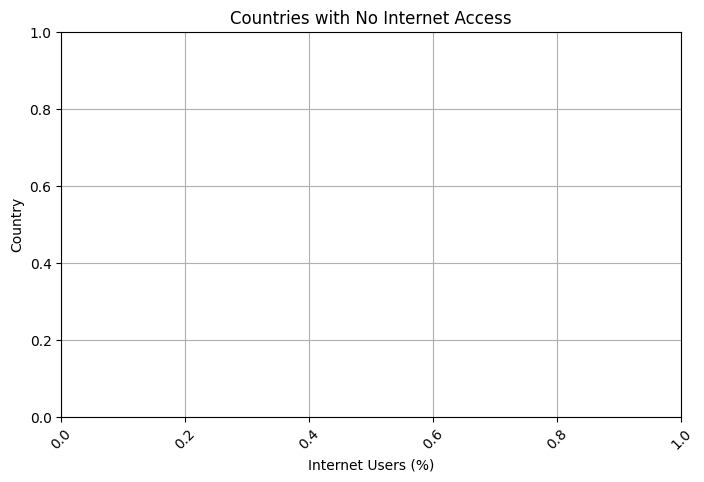

In [37]:
no_internet = net[net["Internet users"] == 0]
plt.figure(figsize=(8, 5))
sns.barplot(y=no_internet["Country Name"], x=no_internet["Internet users"], color="red")
plt.title("Countries with No Internet Access")
plt.xlabel("Internet Users (%)")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h1>Insight 6:Average Birth Rate</h1>

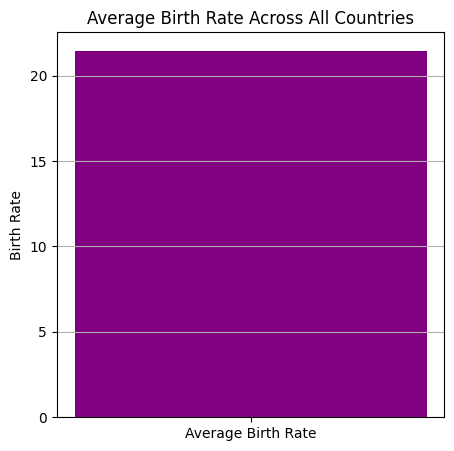

In [36]:
avg_birth_rate = net["Birth rate"].mean()
plt.figure(figsize=(5, 5))
plt.bar(["Average Birth Rate"], [avg_birth_rate], color="purple")
plt.title("Average Birth Rate Across All Countries")
plt.ylabel("Birth Rate")
plt.grid(axis='y')
plt.show()

<h1>Insight 7: Scatter Plot: Birth Rate vs. Internet Usage</h1>

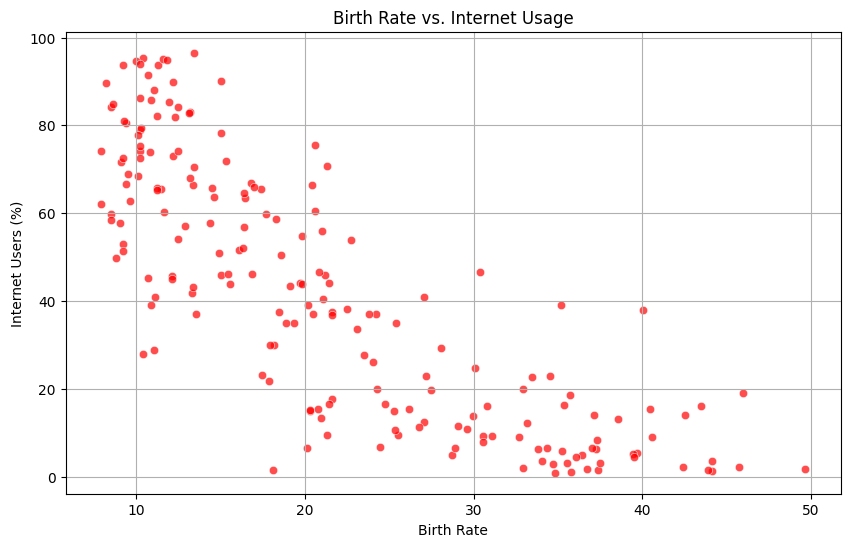

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=net["Birth rate"], y=net["Internet users"], alpha=0.7, color="red")
plt.title("Birth Rate vs. Internet Usage")
plt.xlabel("Birth Rate")
plt.ylabel("Internet Users (%)")
plt.grid(True)
plt.show()

<h1>Insight 8: Countries with Birth Rates Above 40</h1>

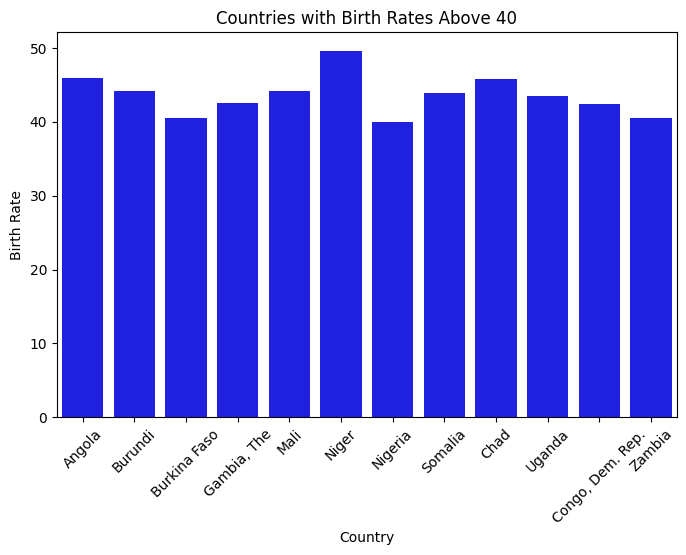

In [30]:
high_birth_rate = net[net["Birth rate"] > 40]
plt.figure(figsize=(8, 5))
sns.barplot(x=high_birth_rate["Country Name"], y=high_birth_rate["Birth rate"], color="blue")
plt.title("Countries with Birth Rates Above 40")
plt.xlabel("Country")
plt.ylabel("Birth Rate")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 9:Pie Chart of Income Groups</h1>

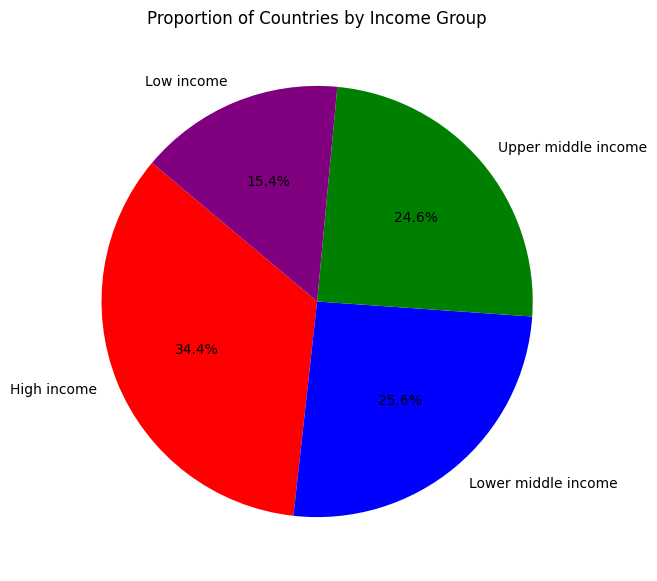

In [25]:
plt.figure(figsize=(7, 7))
income_counts.plot(kind="pie", autopct="%.1f%%", colors=["red", "blue", "green", "purple", "orange"], startangle=140)
plt.title("Proportion of Countries by Income Group")
plt.ylabel("")
plt.show()

<h1>Insight 10: Correlation Between Birth Rate and Internet Usage</h1>

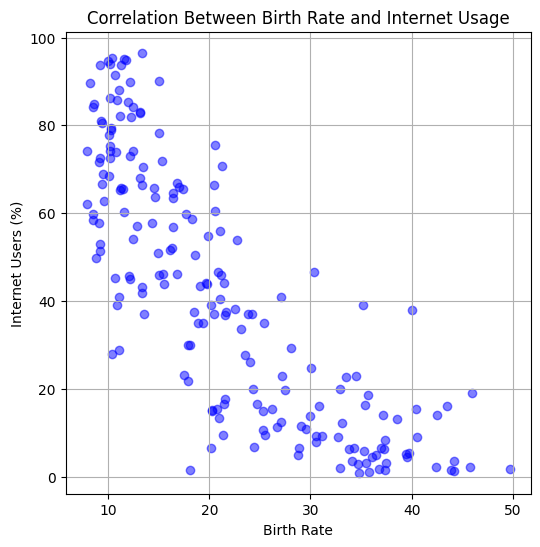

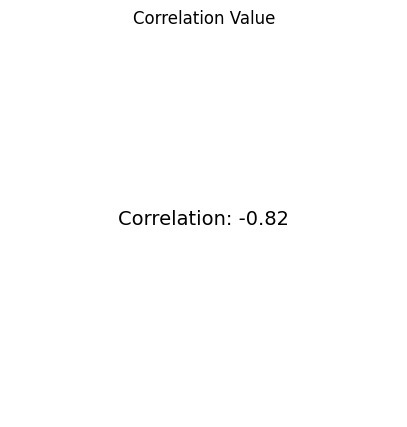

In [35]:
correlation = net["Birth rate"].corr(net["Internet users"])
plt.figure(figsize=(6, 6))
plt.scatter(net["Birth rate"], net["Internet users"], alpha=0.5, color="blue")
plt.title("Correlation Between Birth Rate and Internet Usage")
plt.xlabel("Birth Rate")
plt.ylabel("Internet Users (%)")
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
plt.text(0.5, 0.5, f"Correlation: {correlation:.2f}", fontsize=14, ha='center')
plt.title("Correlation Value")
plt.axis("off")
plt.show()
